In [ ]:
# import the libraries 
from tensorflow import keras
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
# re-size all the images 
img_width, img_height = 299, 299

train_path = '/content/drive/MyDrive/Machine_learning_Proposal/Data/course_project/train'
valid_path = '/content/drive/MyDrive/Machine_learning_Proposal/Data/course_project/val'
test_path = '/content/drive/MyDrive/Machine_learning_Proposal/Data/course_project/test'

In [ ]:
# Import InceptionResnetV2
# Here we will be using imagenet weights

base_model=InceptionResNetV2(weights='imagenet',include_top=False, input_shape=(img_width, img_height, 3))

In [ ]:
# Not training existing weights
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Easier to use them later to get the number of classes
folders = glob('/content/drive/MyDrive/Machine_learning_Proposal/Data/course_project/train/*')

In [ ]:
# our layers - 
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation = 'relu')(x)
x = Dropout(0.5)(x)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

In [ ]:
# create a model object
model = Model(inputs=base_model.input, outputs=prediction)


In [ ]:
#Visualizing the model architecture
pip install visualkeras

     |████████████████████████████████| 992 kB 18.1 MB/s 


In [ ]:
import visualkeras

In [ ]:
visualkeras.layered_view(model, legend=True)

In [ ]:
# view the structure of the model
model.summary()

In [ ]:
# Loss and optimization method to be used in the model
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
#Data preprocessing, augmentation
train_datagen=ImageDataGenerator(
    rotation_range=20,
    horizontal_flip=True,
    preprocessing_function=preprocess_input)
validation_datagen = ImageDataGenerator(
    rotation_range=20,
    horizontal_flip=True,
    preprocessing_function=preprocess_input)

In [ ]:
test_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
#Loading data
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (img_width, img_height),
                                                 color_mode='rgb',
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                                 seed = 123,
                                                 shuffle=True)

validation_set = validation_datagen.flow_from_directory(valid_path,
                                                        target_size = (img_width, img_height),
                                                        color_mode='rgb',
                                                        batch_size = 32,
                                                        class_mode = 'categorical',
                                                        seed = 123,
                                                        shuffle=True)
test_set = test_datagen.flow_from_directory(test_path,
                                                        target_size = (img_width, img_height),
                                                        color_mode='rgb',
                                                        batch_size = 32,
                                                        class_mode = 'categorical',
                                                        seed = 123,
                                                        shuffle=True)

Found 2523 images belonging to 10 classes.
Found 310 images belonging to 10 classes.
Found 325 images belonging to 10 classes.


In [ ]:
#Saving models
%cd /content/drive/MyDrive/Machine_learning_Proposal/Data/course_project/

/content/drive/MyDrive/Machine_learning_Proposal/Data/course_project


In [ ]:
from keras.callbacks import *

In [ ]:
run_index = 1 # increment this at every run
run_logdir = os.path.join(os.curdir, "my_final_model", "run_{:03d}".format(run_index))
run_logdir

'./my_final_model/run_001'

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("model_final.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [ ]:
# fit the model
history = model.fit_generator(
  training_set,
  validation_data=validation_set,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(validation_set),
  callbacks=[checkpoint_cb,tensorboard_cb])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == '__main__':


Epoch 1/30
79/79 [==============================] - 2912s 37s/step - loss: 1.8185 - accuracy: 0.4233 - val_loss: 1.2938 - val_accuracy: 0.5484
Epoch 2/30
79/79 [==============================] - 410s 5s/step - loss: 1.4365 - accuracy: 0.5030 - val_loss: 1.2026 - val_accuracy: 0.6097
Epoch 3/30
79/79 [==============================] - 407s 5s/step - loss: 1.3002 - accuracy: 0.5470 - val_loss: 1.1764 - val_accuracy: 0.6000
Epoch 4/30
79/79 [==============================] - 409s 5s/step - loss: 1.2787 - accuracy: 0.5497 - val_loss: 1.1083 - val_accuracy: 0.5968
Epoch 5/30
79/79 [==============================] - 429s 5s/step - loss: 1.2200 - accuracy: 0.5700 - val_loss: 1.0266 - val_accuracy: 0.6226
Epoch 6/30
79/79 [==============================] - 407s 5s/step - loss: 1.1813 - accuracy: 0.5838 - val_loss: 1.0081 - val_accuracy: 0.6290
Epoch 7/30
79/79 [==============================] - 409s 5s/step - loss: 1.1246 - accuracy: 0.6072 - val_loss: 0.9855 - val_accuracy: 0.6548
Epoch 8/30


In [ ]:
#### Model Evaluation #####

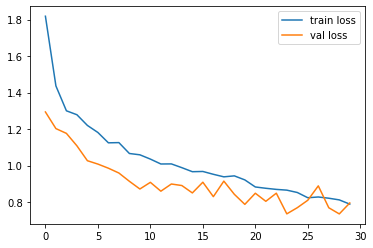

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')



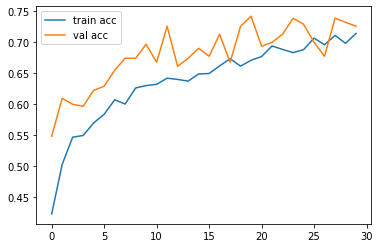

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model_reload = keras.models.load_model("model_final.h5")

In [ ]:
# Model performance on validation data

In [ ]:
score = model_reload.evaluate_generator(validation_set)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


In [ ]:
score

[0.7705612182617188, 0.7354838848114014]

In [ ]:
#Model performance on test data

In [ ]:
test_score = model_reload.evaluate_generator(test_set)
test_score

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.9595930576324463, 0.6830769181251526]